In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("AV_BigMart_Train_UWu5bXk.txt")
test = pd.read_csv("AV_BigMart_Test_u94Q5KV.txt")
submission = pd.read_csv("AV_BigMart_SampleSubmission_TmnO39y.txt")

In [3]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.shape

(8523, 12)

In [6]:
test.shape

(5681, 11)

In [7]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [8]:
train["data"]="train"
test["data"]="test"

In [9]:
train.shape, test.shape

((8523, 13), (5681, 12))

In [10]:
data=pd.concat([train,test])
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [11]:
data = data.reset_index().drop(columns="index")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  data                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [14]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
numerical_columns=data.select_dtypes(include=np.number).drop(columns=['Outlet_Establishment_Year','Item_Outlet_Sales']).columns
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [17]:
categorical_columns=data.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'data'],
      dtype='object')

In [18]:
data[categorical_columns].apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
data                       2
dtype: int64

In [19]:
data[categorical_columns].apply(lambda x: print(x.value_counts()))

FDX50    10
NCX06    10
FDY58    10
FDO09    10
FDG46    10
         ..
FDM50     7
FDL50     7
FDX49     7
FDI46     7
FDM10     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
data                    None
dtype: object

In [20]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [21]:
train[["Outlet_Size","Outlet_Type","Item_Visibility"]].query("Item_Visibility == 0 ")

,Outlet_Size,Outlet_Type,Item_Visibility
3,NaN,Grocery Store,0.0
4,High,Supermarket Type1,0.0
5,Medium,Supermarket Type2,0.0
10,Medium,Supermarket Type1,0.0
32,Medium,Supermarket Type2,0.0
...,...,...,...
8480,Small,Grocery Store,0.0
8484,High,Supermarket Type1,0.0
8486,NaN,Grocery Store,0.0
8494,NaN,Supermarket Type1,0.0


In [22]:
train.groupby(["Item_Visibility","Item_Type"]).Item_Outlet_Sales.mean()

Item_Visibility  Item_Type            
0.000000         Baking Goods             1598.334276
                 Breads                   2612.090059
                 Breakfast                1828.064867
                 Canned                   2257.667273
                 Dairy                    2220.057537
                                             ...     
0.309390         Household                 138.486400
0.311090         Baking Goods              154.465600
0.321115         Fruits and Vegetables     199.740000
0.325781         Household                 761.009400
0.328391         Canned                    588.567200
Name: Item_Outlet_Sales, Length: 8006, dtype: float64

In [23]:
data.Outlet_Size.isna().sum()

4016

In [24]:
data.groupby("Outlet_Size").Outlet_Size.count()

Outlet_Size
High      1553
Medium    4655
Small     3980
Name: Outlet_Size, dtype: int64

In [25]:
data[["Outlet_Size","Outlet_Identifier"]].drop_duplicates().pivot(columns="Outlet_Size",values="Outlet_Identifier")

Outlet_Size,NaN,High,Medium,Small
0,NaN,NaN,OUT049,NaN
1,NaN,NaN,OUT018,NaN
3,OUT010,NaN,NaN,NaN
4,NaN,OUT013,NaN,NaN
7,NaN,NaN,OUT027,NaN
8,OUT045,NaN,NaN,NaN
9,OUT017,NaN,NaN,NaN
11,NaN,NaN,NaN,OUT046
19,NaN,NaN,NaN,OUT035
23,NaN,NaN,NaN,OUT019


In [26]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [27]:
data["Item_Fat_Content"].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg': 'Regular' }, inplace = True)

In [28]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
data.pivot_table(values="Item_Weight", index = "Item_Identifier")

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [30]:
data["Item_Weight"] = data.groupby("Item_Identifier").Item_Weight.transform(lambda x : x.fillna(x.mean()))

In [31]:
data[data["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data


In [32]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

In [33]:
data["Outlet_Size"].isna().sum()

4016

In [34]:
data["Outlet_Size"] = data["Outlet_Size"].fillna("Small")

In [35]:
data.Outlet_Identifier.drop_duplicates()

0     OUT049
1     OUT018
3     OUT010
4     OUT013
7     OUT027
8     OUT045
9     OUT017
11    OUT046
19    OUT035
23    OUT019
Name: Outlet_Identifier, dtype: object

In [36]:
data["Item_Visibility"] = data["Item_Visibility"].replace({0:np.NAN})

In [37]:
truth_table_item_outlet_type_visibility = data.pivot_table(values="Item_Visibility", index = "Item_Type", columns = "Outlet_Type")

In [38]:
def find_visibility(x):
    return truth_table_item_outlet_type_visibility.loc[x["Item_Type"], x["Outlet_Type"]]

In [39]:
find_visibility(test)

Outlet_Type,Supermarket Type1,Supermarket Type1,Grocery Store,Supermarket Type1,Supermarket Type3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Supermarket Type1,Supermarket Type1,...,Supermarket Type1,Supermarket Type1,Supermarket Type2,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type2,Supermarket Type1,Supermarket Type1,Supermarket Type1
Item_Type,,,,,,,,,,,,,,,,,,,,,
Snack Foods,0.065578,0.065578,0.114660,0.065578,0.065126,0.065578,0.065584,0.065126,0.065578,0.065578,...,0.065578,0.065578,0.065584,0.065578,0.065578,0.065578,0.065584,0.065578,0.065578,0.065578
Dairy,0.069299,0.069299,0.120742,0.069299,0.069213,0.069299,0.069000,0.069213,0.069299,0.069299,...,0.069299,0.069299,0.069000,0.069299,0.069299,0.069299,0.069000,0.069299,0.069299,0.069299
Others,0.055688,0.055688,0.096714,0.055688,0.055413,0.055688,0.056357,0.055413,0.055688,0.055688,...,0.055688,0.055688,0.056357,0.055688,0.055688,0.055688,0.056357,0.055688,0.055688,0.055688
Snack Foods,0.065578,0.065578,0.114660,0.065578,0.065126,0.065578,0.065584,0.065126,0.065578,0.065578,...,0.065578,0.065578,0.065584,0.065578,0.065578,0.065578,0.065584,0.065578,0.065578,0.065578
Dairy,0.069299,0.069299,0.120742,0.069299,0.069213,0.069299,0.069000,0.069213,0.069299,0.069299,...,0.069299,0.069299,0.069000,0.069299,0.069299,0.069299,0.069000,0.069299,0.069299,0.069299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snack Foods,0.065578,0.065578,0.114660,0.065578,0.065126,0.065578,0.065584,0.065126,0.065578,0.065578,...,0.065578,0.065578,0.065584,0.065578,0.065578,0.065578,0.065584,0.065578,0.065578,0.065578
Starchy Foods,0.066730,0.066730,0.117891,0.066730,0.067608,0.066730,0.068340,0.067608,0.066730,0.066730,...,0.066730,0.066730,0.068340,0.066730,0.066730,0.066730,0.068340,0.066730,0.066730,0.066730
Health and Hygiene,0.055021,0.055021,0.098924,0.055021,0.054924,0.055021,0.053081,0.054924,0.055021,0.055021,...,0.055021,0.055021,0.053081,0.055021,0.055021,0.055021,0.053081,0.055021,0.055021,0.055021


In [40]:
data[data["Item_Visibility"].isnull()].apply(find_visibility, axis= 1)

3        0.114820
4        0.057774
5        0.068206
10       0.067123
32       0.065584
           ...   
14166    0.114820
14171    0.067549
14177    0.065578
14184    0.065485
14202    0.066167
Length: 879, dtype: float64

In [41]:
data["Item_Visibility"].isna().sum()

879

In [42]:
data["Item_Visibility"].fillna(data[data["Item_Visibility"].isnull()].apply(find_visibility, axis= 1), inplace = True)

In [43]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'data'],
      dtype='object')

In [44]:
data["Outlet_Age"] = 2013 - data["Outlet_Establishment_Year"]

In [45]:
del data["Outlet_Establishment_Year"]

<AxesSubplot:>

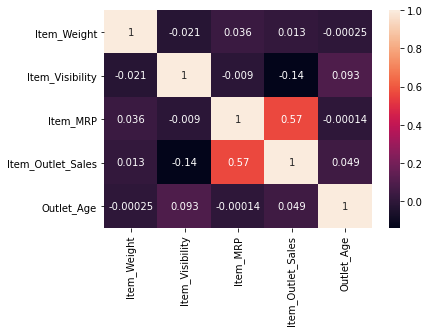

In [46]:
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot=True)

In [47]:
data["Item_Identifier_group"] = data["Item_Identifier"].apply(lambda x : x[0:2])

In [48]:
#data["Item_Identifier_subgroup"] = data["Item_Identifier"].apply(lambda x : x[0:3])

In [49]:
category_data_columns = data.select_dtypes(exclude = np.number).drop(columns=["Item_Identifier","data"]).columns

In [50]:
numeric_data_columns = data.select_dtypes(include = np.number).drop(columns = "Item_Outlet_Sales").columns

In [51]:
scaler = StandardScaler()
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(data[numeric_data_columns]), columns=numeric_data_columns)

In [52]:
preprocess_category_data_columns = pd.get_dummies(data[category_data_columns])

In [53]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, data[["Item_Identifier","Outlet_Identifier","data", "Item_Outlet_Sales"]]], axis = 1)

In [54]:
train_preprocessed = final_preprocessed[final_preprocessed["data"]=="train"]

In [55]:
test_preprocessed = final_preprocessed[final_preprocessed["data"]=="test"]

In [56]:
test_preprocessed = test_preprocessed.drop(columns = ["data","Item_Outlet_Sales"])

In [57]:
train_preprocessed = train_preprocessed.drop(columns = ["data"])

In [58]:
train_preprocessed.to_csv("AV_BigMart_train_preprocessed.csv")
test_preprocessed.to_csv("AV_BigMart_test_preprocessed.csv")

In [59]:
train_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Identifier_group_DR,Item_Identifier_group_FD,Item_Identifier_group_NC,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,-0.751014,-1.112295,1.752511,-0.139681,FDA15,OUT049,3735.1380
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,-1.477653,-1.046017,-1.493696,-1.334228,DRC01,OUT018,443.4228
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1.011839,-1.097673,0.009874,-0.139681,FDN15,OUT049,2097.2700
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1.377308,0.913882,0.661838,-0.020226,FDX07,OUT010,732.3800
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,-0.830557,-0.256345,-1.403623,1.293777,NCD19,OUT013,994.7052


In [60]:
test_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type3,Item_Identifier_group_DR,Item_Identifier_group_FD,Item_Identifier_group_NC,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier,Outlet_Identifier
8523,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1.710530,-1.286299,-0.533831,-0.139681,FDW58,OUT049
8524,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,-0.965996,-0.653196,-0.864708,-1.095319,FDW14,OUT017
8525,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0.388391,0.601144,1.622763,-0.020226,NCN55,OUT010
8526,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,-1.177753,-1.125811,0.225966,-1.095319,FDQ58,OUT017
8527,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0.173409,0.991400,1.501577,1.532686,FDY38,OUT027


In [61]:
model = LinearRegression()

In [62]:
X = train_preprocessed.drop(columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"])

In [63]:
y = train_preprocessed["Item_Outlet_Sales"]

In [64]:
model.fit(X,y)

LinearRegression()

In [65]:
mean_squared_error(y, model.predict(X),squared=False)

1127.6075800493481

In [66]:
X_test = test_preprocessed.drop(columns=["Item_Identifier","Outlet_Identifier"])

In [67]:
y_pred = model.predict(X_test)

In [68]:
test_preprocessed["Item_Outlet_Sales"] = y_pred

In [69]:
submit=test_preprocessed[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [70]:
submit

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1834.0
8524,FDW14,OUT017,1554.0
8525,NCN55,OUT010,1878.0
8526,FDQ58,OUT017,2608.0
8527,FDY38,OUT027,5169.0
...,...,...,...
14199,FDB58,OUT046,2279.5
14200,FDD47,OUT018,2494.0
14201,NCO17,OUT045,1810.0
14202,FDJ26,OUT017,3600.0


In [71]:
submit['Item_Outlet_Sales'] = np.abs(submit['Item_Outlet_Sales'])

<ipython-input-71-032e8e6f9fcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Item_Outlet_Sales'] = np.abs(submit['Item_Outlet_Sales'])


In [72]:
submit.to_csv("linear_regression_result.csv", index = False)

In [74]:
model_Ridge = RidgeRegresion()
model_Ridge.fit(X,y)
print("MSE : " mean_squared_error(y, model_Ridge.predict(X),squared=False))
y_pred_Ridge = model_Ridge.predict(X_test)
test_preprocessed["Item_Outlet_Sales"] = y_pred_Ridge
submit=test_preprocessed[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submit['Item_Outlet_Sales'] = np.abs(submit['Item_Outlet_Sales'])
submit.to_csv("Ridge_regression_result.csv", index = False)

SyntaxError: invalid syntax (<ipython-input-74-3386e18583ce>, line 3)

In [88]:
model_Ridge = Ridge()
model_Ridge.fit(X,y)
#print("MSE : " mean_squared_error(y, model_Ridge.predict(X),squared=False))
mean_squared_error(y, model_Ridge.predict(X),squared=False)

1127.0862061426456

In [84]:
y_pred_Ridge = model_Ridge.predict(X_test)
test_preprocessed["Item_Outlet_Sales"] = y_pred_Ridge
submit=test_preprocessed[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submit['Item_Outlet_Sales'] = np.abs(submit['Item_Outlet_Sales'])
submit.to_csv("Ridge_regression_result.csv", index = False)

<ipython-input-84-9a3ee858c72e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Item_Outlet_Sales'] = np.abs(submit['Item_Outlet_Sales'])


In [90]:
model_Lasso = Lasso()
model_Lasso.fit(X,y)
#print("MSE : " mean_squared_error(y, model_Ridge.predict(X),squared=False))
mean_squared_error(y, model_Lasso.predict(X),squared=False)



1127.2392531081045

In [91]:
y_pred_Lasso = model_Lasso.predict(X_test)
test_preprocessed["Item_Outlet_Sales"] = y_pred_Lasso
submit=test_preprocessed[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submit['Item_Outlet_Sales'] = np.abs(submit['Item_Outlet_Sales'])
submit.to_csv("Lasso_regression_result.csv", index = False)

<ipython-input-91-c8c3f76f9c3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Item_Outlet_Sales'] = np.abs(submit['Item_Outlet_Sales'])


In [97]:
model_ElasticNet = ElasticNet(l1_ratio=0.5, alpha= 1)
model_ElasticNet.fit(X,y)
#print("MSE : " mean_squared_error(y, model_Ridge.predict(X),squared=False))
mean_squared_error(y, model_ElasticNet.predict(X),squared=False)

1283.6837440073375

In [98]:
y_pred_ElasticNet = model_ElasticNet.predict(X_test)
test_preprocessed["Item_Outlet_Sales"] = y_pred_ElasticNet
submit=test_preprocessed[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submit['Item_Outlet_Sales'] = np.abs(submit['Item_Outlet_Sales'])
submit.to_csv("ElasticNet_regression_result.csv", index = False)

<ipython-input-98-68dcbec0b468>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Item_Outlet_Sales'] = np.abs(submit['Item_Outlet_Sales'])
